<h1>XỬ LÝ DỮ LIỆU</h1>

In [8]:
import pandas as pd
old_df = pd.read_csv('the_oscar_award.csv', usecols=['year_film','category', 'film'])
rslt_df = old_df[(old_df['year_film'] == 1927)]
df = rslt_df.drop(columns=['year_film'])
df.dropna()
df = df.dropna(subset=['film'])
df.drop_duplicates()
df

,category,film
0,ACTOR,The Noose
1,ACTOR,The Last Command
2,ACTRESS,A Ship Comes In
3,ACTRESS,7th Heaven
4,ACTRESS,Sadie Thompson
5,ART DIRECTION,Sunrise
6,ART DIRECTION,The Dove;
7,ART DIRECTION,7th Heaven
8,CINEMATOGRAPHY,The Devil Dancer;
9,CINEMATOGRAPHY,Sunrise


In [9]:
import networkx as nx 
from networkx.algorithms import bipartite 
B = nx.Graph() 
category = df['category'] 
film = df['film'] 
print("Số đề cử", category.nunique()) 
print("Số phim", film.nunique()) 
print("Số cạnh", len(df))

Số đề cử 12
Số phim 19
Số cạnh 29


In [10]:
for index, row in df.iterrows():
    B.add_edge(row['category'],row['film'],weight=1) 
B.add_nodes_from(film,bipartite = 0)
B.add_nodes_from(category,bipartite = 1) 

<h1>ĐỒ THỊ HAI PHÍA</h1>

<Figure size 864x864 with 0 Axes>

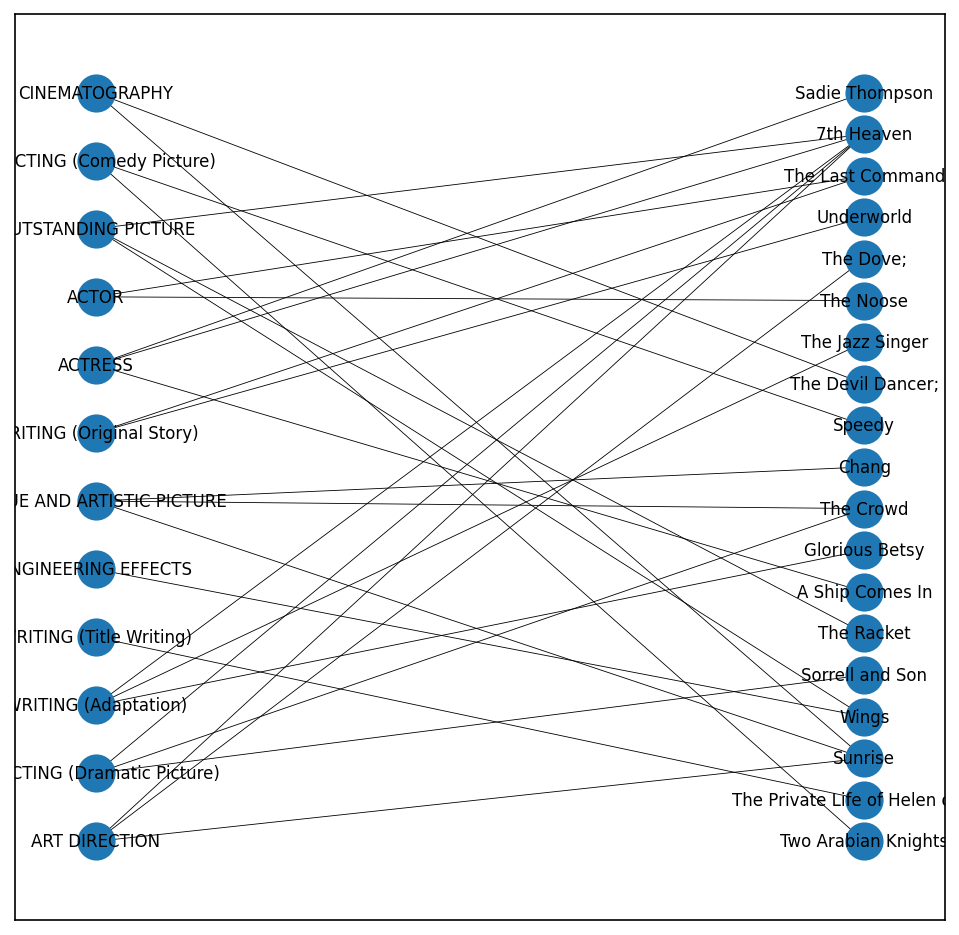

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 12)) 
pos = nx.spring_layout(B) 
fig, ax = plt. subplots(1,1, figsize=(8,8), dpi=150) 
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, category),font_size=8,width= 0.4)

<h1>ĐỒ THỊ MỘT PHÍA</h1>

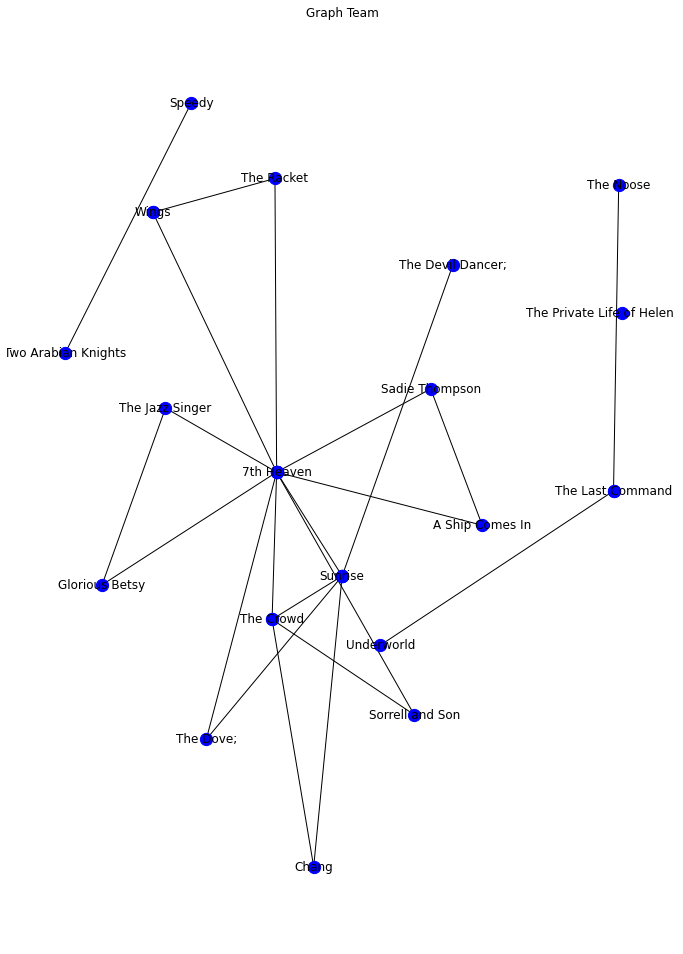

In [12]:
G = bipartite.weighted_projected_graph(B, film) 
plt. figure(figsize=(12, 17))

layout = nx.spring_layout(G, k=1)

nx.draw_networkx_nodes (G,
                        layout, 
                        nodelist=film, 
                        node_size=150,
                        node_color='blue') 
nx.draw_networkx_edges(G, layout, edge_color="#000000") 
node_labels = dict(zip(film, film)) 
nx.draw_networkx_labels(G, layout, labels=node_labels) 
plt.axis ('off')

plt.title("Graph Team")

plt.show()

In [7]:
labels = nx.get_edge_attributes (G, 'weight')
df2 = pd.DataFrame (columns=['source', 'target', 'weight']) 
for key, value in labels.items():
    df2 =pd.concat([df, pd.DataFrame.from_records([{ 'source': key[0], 'target': key[1], 'weight':value}])], ignore_index=True)
df2.to_csv (r'mydata_oscar.csv', index = False, header=True)

<h1>LOUVAIN</h1>

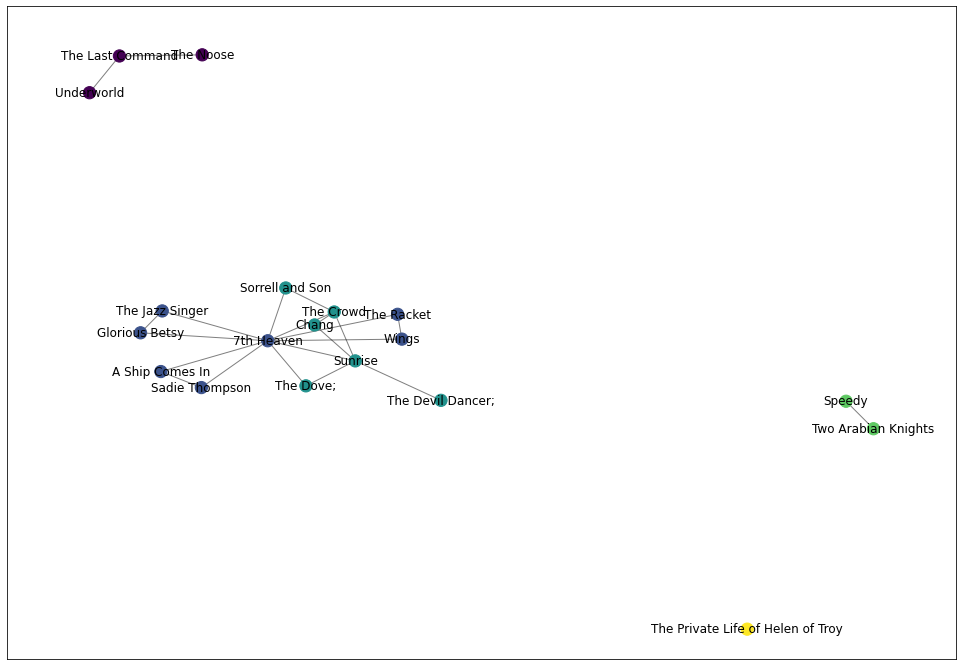

In [13]:
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain
plt.figure(figsize=(17, 12))
# compute the best partition
partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout (G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges (G, pos, alpha=0.5) 
nx.draw_networkx_labels (G, pos)
plt.show()

<h1>PAGERANK</h1>

In [14]:
G = bipartite.weighted_projected_graph(B, film)
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
pagerank_dataframe = pd.DataFrame(pagerank.items(), columns=['Node', "Pagerank"])
pagerank_dataframe

,Node,Pagerank
0,The Noose,0.042437
1,The Last Command,0.080415
2,A Ship Comes In,0.040052
3,7th Heaven,0.173713
4,Sadie Thompson,0.040052
5,Sunrise,0.091366
6,The Dove;,0.038562
7,The Devil Dancer;,0.023797
8,Two Arabian Knights,0.055096
9,Speedy,0.055096


In [15]:
print("Top 10 Film có Pagerank cao nhất")
sorted_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)
take_pagerank = sorted_pagerank[:10]
top_pagerank = pd.DataFrame(take_pagerank, columns=['Node', "Pagerank"])
top_pagerank

Top 10 Film có Pagerank cao nhất


,Node,Pagerank
0,7th Heaven,0.173713
1,Sunrise,0.091366
2,The Last Command,0.080415
3,The Crowd,0.071351
4,Two Arabian Knights,0.055096
5,Speedy,0.055096
6,The Noose,0.042437
7,Underworld,0.042437
8,A Ship Comes In,0.040052
9,Sadie Thompson,0.040052


<H1>CLOSENESS CENTRALITY</H1>

In [16]:
G = bipartite.weighted_projected_graph(B, film)
closeness_centrality = nx.closeness_centrality(G)
closeness_dataframe = pd.DataFrame(closeness_centrality.items(), columns=["Node", "Closeness centrality"])
closeness_dataframe

,Node,Closeness centrality
0,The Noose,0.074074
1,The Last Command,0.111111
2,A Ship Comes In,0.333333
3,7th Heaven,0.571429
4,Sadie Thompson,0.333333
5,Sunrise,0.421053
6,The Dove;,0.363636
7,The Devil Dancer;,0.266667
8,Two Arabian Knights,0.055556
9,Speedy,0.055556


In [17]:
print("Top 10 Film có Closeness centrality cao nhất")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
take_sorted_closeness_centrality = sorted_closeness_centrality[:10]
top_closeness_centrality = pd.DataFrame(take_sorted_closeness_centrality, columns=['Node', "Closeness centrality"])
top_closeness_centrality

Top 10 Film có Closeness centrality cao nhất


,Node,Closeness centrality
0,7th Heaven,0.571429
1,Sunrise,0.421053
2,The Crowd,0.400000
3,The Dove;,0.363636
4,Sorrell and Son,0.347826
5,A Ship Comes In,0.333333
6,Sadie Thompson,0.333333
7,Wings,0.333333
8,The Racket,0.333333
9,The Jazz Singer,0.333333


<H1>EIGENVECTOR CENTRALITY</H1>

In [18]:
G = bipartite.weighted_projected_graph(B, film)
eigenvector = nx.eigenvector_centrality(G, max_iter=100, tol=1.0e-6, nstart=None, weight='weight')
eigenvector_dataframe = pd.DataFrame(eigenvector.items(), columns=['Node', "Eigenvector centrality"]).head(10)
eigenvector_dataframe

,Node,Eigenvector centrality
0,The Noose,2.365478e-06
1,The Last Command,3.345290e-06
2,A Ship Comes In,1.996907e-01
3,7th Heaven,5.971372e-01
4,Sadie Thompson,1.996907e-01
5,Sunrise,3.635712e-01
6,The Dove;,2.407598e-01
7,The Devil Dancer;,9.111304e-02
8,Two Arabian Knights,1.363820e-07
9,Speedy,1.363820e-07


<H1>BETWEENNESS CENTRALITY</H1>

In [19]:
G = bipartite.weighted_projected_graph(B, film)
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)
betweenness_dataframe = pd.DataFrame(betweenness_centrality.items(), columns=['Node', "Betweenness centrality"])
betweenness_dataframe

,Node,Betweenness centrality
0,The Noose,0.0
1,The Last Command,1.0
2,A Ship Comes In,0.0
3,7th Heaven,50.5
4,Sadie Thompson,0.0
5,Sunrise,16.0
6,The Dove;,0.0
7,The Devil Dancer;,0.0
8,Two Arabian Knights,0.0
9,Speedy,0.0


In [20]:
print("Top 10 Film có Betweenness centrality cao nhất")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
take_sorted_betweenness_centrality = sorted_betweenness_centrality[:10]
top_betweenness_centrality = pd.DataFrame(take_sorted_betweenness_centrality, columns=['Node', "Betweenness centrality"])
top_betweenness_centrality

Top 10 Film có Betweenness centrality cao nhất


,Node,Betweenness centrality
0,7th Heaven,50.5
1,Sunrise,16.0
2,The Crowd,5.5
3,The Last Command,1.0
4,The Noose,0.0
5,A Ship Comes In,0.0
6,Sadie Thompson,0.0
7,The Dove;,0.0
8,The Devil Dancer;,0.0
9,Two Arabian Knights,0.0


In [21]:
import numpy as np
values = list(partition.values())
print("Number of communities: ", len(np.unique(values)))
print("\n")
groups_louvain = [] 
print("Phân cụm")
for i in range(len(np.unique(values))):
  print("\n" + "group ", i, "***********************************")
  group = []
  for name, k in partition.items():
    if k == i:
       print(name, end=',')
       group.append(name)
  groups_louvain.append(group)

Number of communities:  5


Phân cụm

group  0 ***********************************
The Noose,The Last Command,Underworld,
group  1 ***********************************
A Ship Comes In,7th Heaven,Sadie Thompson,Wings,The Racket,The Jazz Singer,Glorious Betsy,
group  2 ***********************************
Sunrise,The Dove;,The Devil Dancer;,Sorrell and Son,The Crowd,Chang,
group  3 ***********************************
Two Arabian Knights,Speedy,
group  4 ***********************************
The Private Life of Helen of Troy,

In [22]:
group0 = df.loc[df["film"].isin(groups_louvain[0])]
group1 = df.loc[df["film"].isin(groups_louvain[1])]
group2 = df.loc[df["film"].isin(groups_louvain[2])]
group3 = df.loc[df["film"].isin(groups_louvain[3])]
group4 = df.loc[df["film"].isin(groups_louvain[4])]

In [23]:
csv0 = pd.pivot_table(group0, values = "film", index=["category"], aggfunc=np.count_nonzero)
group0.to_csv("/Users/pc/OneDrive/Documents/Mang Xa Hoi/group0.csv", index = False, header = True, encoding = "utf-8")

csv1 = pd.pivot_table(group1, values = "film", index=["category"], aggfunc=np.count_nonzero)
group1.to_csv("/Users/pc/OneDrive/Documents/Mang Xa Hoi/group1.csv", index = False, header = True, encoding = "utf-8")

csv2 = pd.pivot_table(group1, values = "film", index=["category"], aggfunc=np.count_nonzero)
group2.to_csv("/Users/pc/OneDrive/Documents/Mang Xa Hoi/group2.csv", index = False, header = True, encoding = "utf-8")

csv3 = pd.pivot_table(group1, values = "film", index=["category"], aggfunc=np.count_nonzero)
group3.to_csv("/Users/pc/OneDrive/Documents/Mang Xa Hoi/group3.csv", index = False, header = True, encoding = "utf-8")

csv4 = pd.pivot_table(group1, values = "film", index=["category"], aggfunc=np.count_nonzero)
group4.to_csv("/Users/pc/OneDrive/Documents/Mang Xa Hoi/group4.csv", index = False, header = True, encoding = "utf-8")

<H1>GIRVAN NEWMAN</H1>

In [26]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
G = bipartite.weighted_projected_graph(B, film)
given_newman = girvan_newman(G)
groups = []
for com in next(given_newman):
  groups.append(list(com))

print("Girvan Newman")
for i in groups:
  print("\n" + "Group -------------------")
  for name in i:
       print(name, end=',')

Girvan Newman

Group -------------------
The Noose,Underworld,The Last Command,
Group -------------------
The Jazz Singer,The Racket,A Ship Comes In,Glorious Betsy,Wings,7th Heaven,Sadie Thompson,
Group -------------------
The Devil Dancer;,Sorrell and Son,Sunrise,Chang,The Dove;,The Crowd,
Group -------------------
Two Arabian Knights,Speedy,
Group -------------------
The Private Life of Helen of Troy,

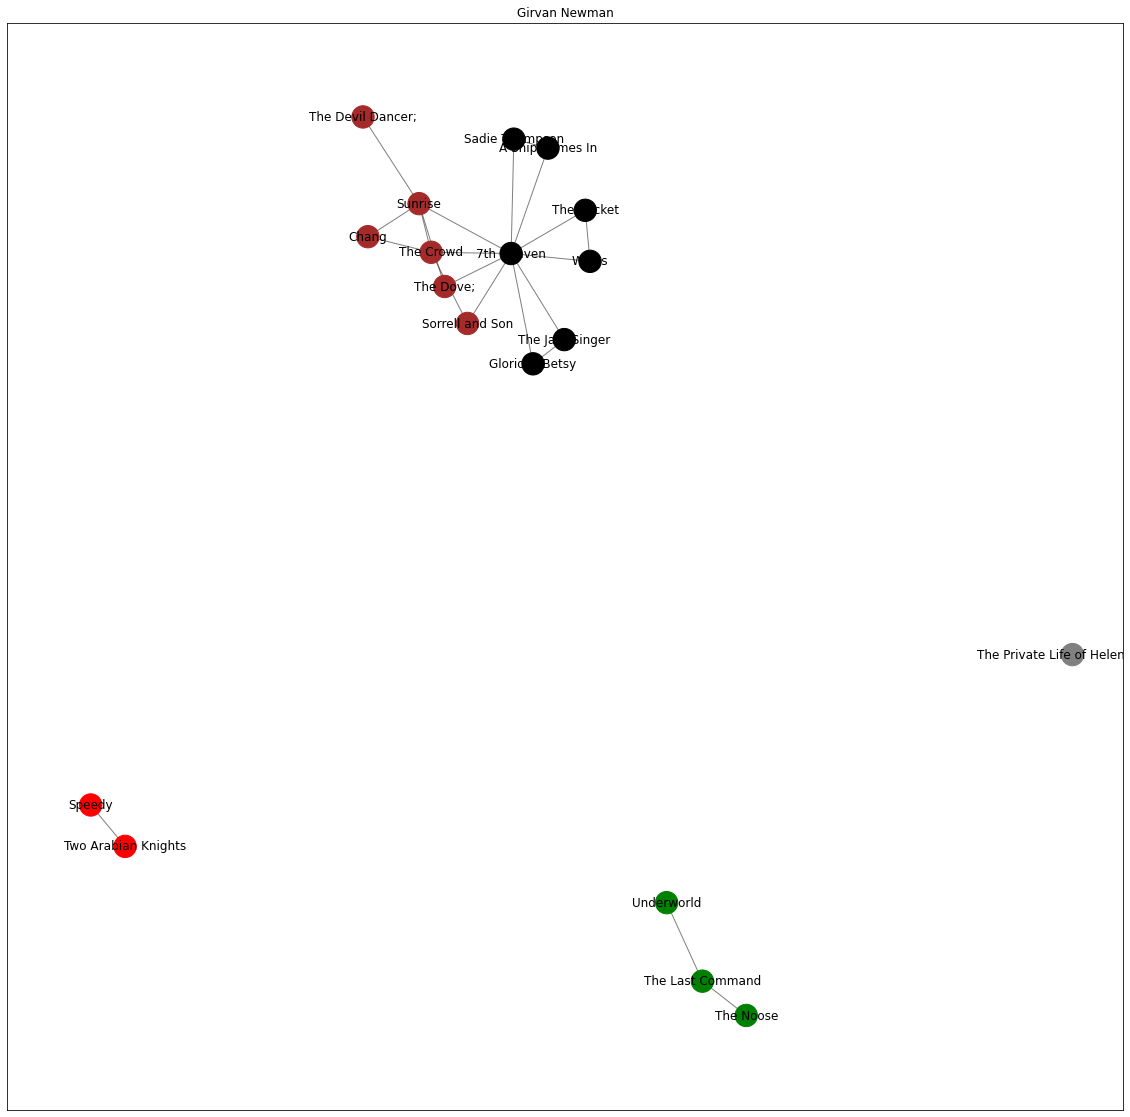

In [27]:
map = []
for node in G:
  if node in groups[0]:
    map.append('green')
  if node in groups[1]:
    map.append('black')
  if node in groups[2]:
    map.append('brown')
  if node in groups[3]:
    map.append('red')
  if node in groups[4]:
    map.append('gray')
plt.figure(figsize=(20,20))
layout_given_newman = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout_given_newman, node_size = 500, node_color = map)
nx.draw_networkx_edges(G, layout_given_newman, alpha=0.5)
nx.draw_networkx_labels(G, layout_given_newman)
plt.title('Girvan Newman')
plt.show()